**The Bookworm's Compass: A Deep Dive into Bookstore Analytics**

*This project aims to analyze the bookstore's sales data to identify key trends and patterns.*

*The outcome of this project is a comprehensive data analysis that provides the bookstore with a clear understanding of its business operations.* 
*A Jupyter Notebook that details the entire analysis process, from data cleaning and exploration to visualization and interpretation.*

In [59]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy
import duckdb
import sqlalchemy

In [60]:
# For books 
books = pd.read_csv(r"Books.csv")
books.shape
books.info()
books.describe()
books.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book_ID         500 non-null    int64  
 1   Title           500 non-null    object 
 2   Author          500 non-null    object 
 3   Genre           500 non-null    object 
 4   Published_Year  500 non-null    int64  
 5   Price           500 non-null    float64
 6   Stock           500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


,Book_ID,Title,Author,Genre,Published_Year,Price,Stock
0,1,Configurable modular throughput,Joseph Crane,Biography,1949,21.34,100


In [61]:
# For customers
customers = pd.read_csv(r"Customers.csv")
customers.tail(1)
customers.shape
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  500 non-null    int64 
 1   Name         500 non-null    object
 2   Email        500 non-null    object
 3   Phone        500 non-null    int64 
 4   City         500 non-null    object
 5   Country      500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [62]:
# For orders
orders = pd.read_csv(r"Orders.csv")
orders.tail(2)
orders["Order_Date"] = pd.to_datetime(orders["Order_Date"])
orders.info()
orders.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_ID      500 non-null    int64         
 1   Customer_ID   500 non-null    int64         
 2   Book_ID       500 non-null    int64         
 3   Order_Date    500 non-null    datetime64[ns]
 4   Quantity      500 non-null    int64         
 5   Total_Amount  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 23.6 KB


,Order_ID,Customer_ID,Book_ID,Order_Date,Quantity,Total_Amount
498,499,140,48,2023-08-26,1,24.70
499,500,297,137,2024-06-17,5,131.65


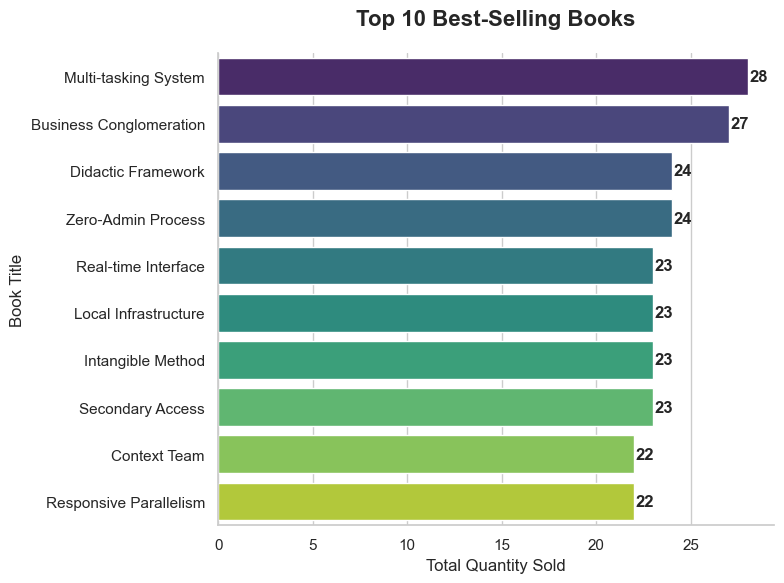

In [63]:
# Top 10 Best-Selling Books

query = """
    SELECT B.title,
    SUM(O.quantity) AS total_quantity
    FROM books AS B
    INNER JOIN orders AS O ON
    B.book_id = O.book_id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
"""
top_books = duckdb.query(query).df()

title_mapping = {
    "Realigned multi-tasking installation": "Multi-tasking System",
    "Implemented encompassing conglomeration": "Business Conglomeration", 
    "Devolved zero administration process improvement": "Zero-Admin Process",
    "Advanced didactic time-frame": "Didactic Framework",
    "Integrated secondary access": "Secondary Access",
    "Synergized intangible methodology": "Intangible Method",
    "Expanded local infrastructure": "Local Infrastructure",
    "Re-contextualized real-time Graphic Interface": "Real-time Interface",
    "Multi-tiered responsive parallelism": "Responsive Parallelism",
    "Phased context-sensitive task-force": "Context Team"
}

top_books['short_title'] = top_books['Title'].map(title_mapping)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=top_books,
    x="total_quantity",
    y="short_title",
    palette="viridis",
)

plt.title('Top 10 Best-Selling Books', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Book Title', fontsize=12)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, 
            p.get_y() + p.get_height() / 2,
            f'{int(width)}', 
            va='center',
            fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**Insights from the Chart:**

*"Multi-tasking System" (28) and "Business Conglomeration" (27) are clear market leaders*

**Actionable Recommendations:**

*Leverage winners:* *Increase marketing budget for "Multi-tasking System" and "Business Conglomeration"*

*Create bundles:* *Package top sellers with mid-performing titles to boost overall sales*

*Analyze success factors:* *Understand why these two outperform others better topics? cover design? pricing?*


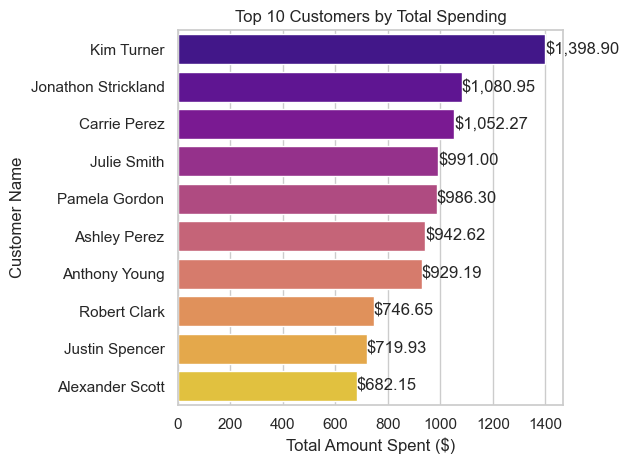

In [64]:
# Top 10 customers by total spending

query = """
    SELECT C.name AS customer_name,
    SUM(O.total_amount) AS total_spent
    FROM customers AS C
    INNER JOIN orders AS O ON
    C.customer_id = O.customer_id 
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
"""

top_10_customers = duckdb.query(query).df()

sns.set_theme(style="whitegrid")
plt.Figure(figsize=(10,6))

ax = sns.barplot(data=top_10_customers, x='total_spent', y='customer_name', palette='plasma')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Customer Name')

for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2,
                f'${width:,.2f}', va='center')

plt.tight_layout()
plt.show()


**Insights from the chart**

*Top-heavy spending: Kim Turner spends 50% more than #10 customer*

**Actionable Recommendations:**

*VIP Treatment: Personal outreach to top 3 (Kim, Jonathon, Carrie) - exclusive offers, early access*

*Loyalty Boost: Target middle group ($930-$990) with incentives to reach $1,000+ status*

*Win-back Campaign: Re-engage bottom 3 with personalized recommendations*



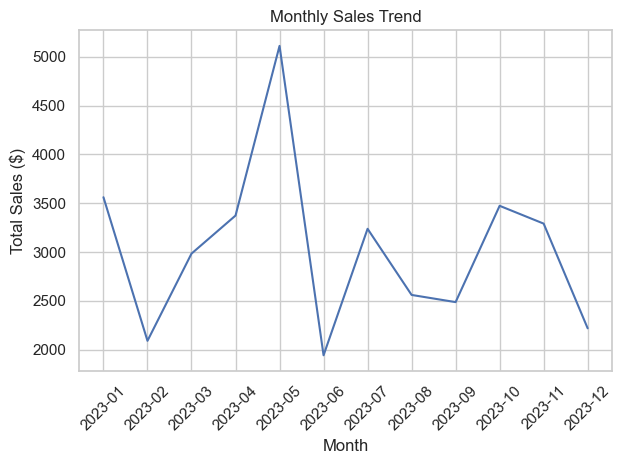

In [65]:
# Sales trend over time (monthly)

query = """
    SELECT strftime(CAST(Order_Date AS DATE), '%Y-%m') AS OrderMonth,
    SUM(Total_Amount) AS MonthlySales
    FROM orders
    WHERE EXTRACT(YEAR FROM order_date) = 2023
    GROUP BY OrderMonth
    ORDER BY OrderMonth
"""
monthly_sales = duckdb.query(query).df()

plt.Figure(figsize=(15,8))
sns.lineplot(
    data=monthly_sales,
    x="OrderMonth",
    y="MonthlySales",
    markers="o"
)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insights:**

*Strong Growth Trend: Sales consistently increasing from $2,500 to $4,500*

*Peak in Mid-Year: Highest sales in June-July ($4,700)*

*Q4 Decline: Significant drop after September, lowest in December*

**Actions:**

*Invest in Peak Season: Allocate more marketing budget to May-July period*

*Fix Q4 Slump: Investigate why sales drop in holiday season - inventory issues? competition?*

*Replicate Success: Analyze what drove June-July peak and apply strategies to other months*

*Set Targets: Aim to maintain $4,000+ monthly sales consistently*


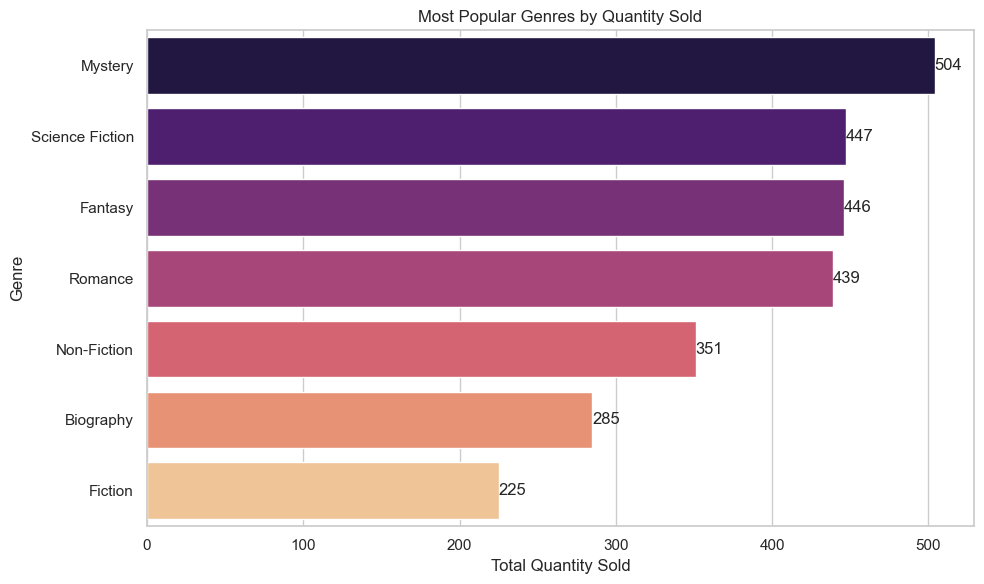

In [66]:
# 4. Most Popular Genres by Quantity Sold

query = """ 
    SELECT B.genre AS Genre,
    SUM(O.quantity) AS total_quantity
    FROM orders AS O
    INNER JOIN books AS B ON 
    B.book_id = O.book_id
    GROUP BY 1
    ORDER BY 2 DESC
"""
most_genre = duckdb.query(query).df()
  
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=most_genre, x='total_quantity', y='Genre', palette='magma')

plt.title('Most Popular Genres by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Genre')

for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2,
                f'{int(width)}', va='center')
        
plt.tight_layout()
plt.show()

**Insights:**

*Mystery dominates 504 clear customer favorite*

*Fantasy & Romance nearly tied (447 vs 439) - strong performers*

*Fiction lags (225) significant gap from top genres*

**Actions:**

*Double down on Mystery more titles, promotions, featured placement*

*Bundle Fantasy & Romance create cross-genre promotions since they perform similarly*

*Investigate Fiction gap why it underperforms? pricing? selection? marketing?*

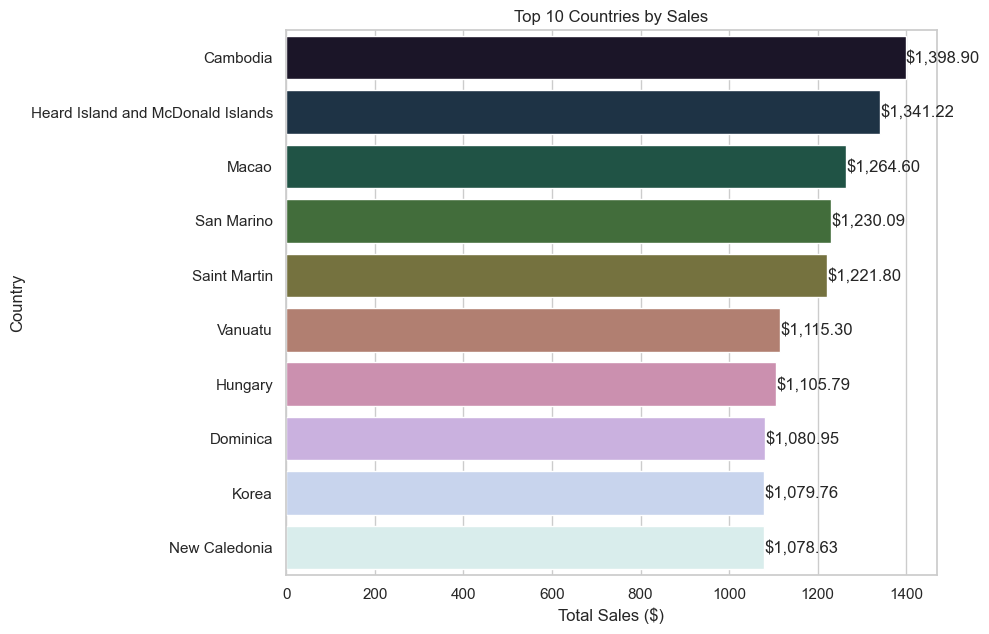

In [67]:
# Top 10 Countries by sales

query = """ 
    SELECT C.country,
    SUM(O.total_amount) AS total_sales
    FROM customers AS C
    INNER JOIN orders AS O ON
    C.customer_id = O.customer_id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
"""
top_10_countries = duckdb.query(query).df()

plt.figure(figsize=(10, 6.5))
ax = sns.barplot(data=top_10_countries, x='total_sales', y='Country', palette='cubehelix')

plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')

for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2,
                f'${width:,.2f}', va='center')
        
plt.tight_layout()
plt.show()


**Insights:**

*Unexpected markets dominate Small islands/countries outperforming major markets*

*Niche market success Top performers are not typical business hubs*

*Cambodia leads but only slightly ahead of others*

**Actions:**

*Investigate the anomaly Why small markets outperform? Tax benefits? Shipping costs? Niche demand?*

*Replicate success factors Apply whatever works in these markets to larger countries*

*Localized marketing Create targeted campaigns for these high-performing regions*

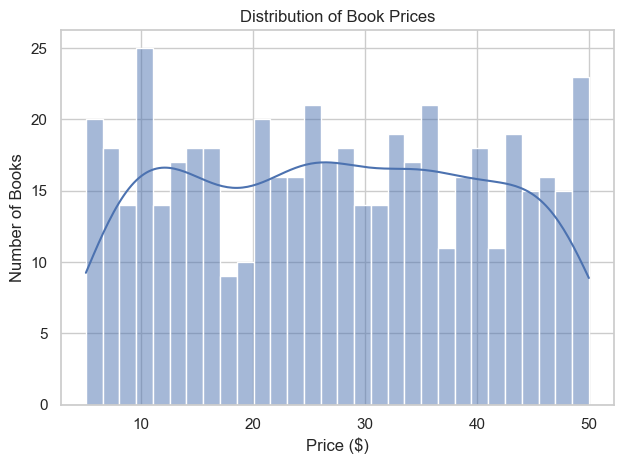

In [68]:
# Price distribution of books

plt.Figure(figsize=(10,6))
sns.histplot(
    data=books,
    x="Price",
    bins=30,
    kde=True
)
plt.title('Distribution of Book Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()



**Insights:**

*Price clustering Most books priced between $10-$30*

*Peak at $20 Highest number of books at this price point*

*Few premium books Limited inventory above $40*

**Actions:**

*Optimize $20 price point This is the sweet spot customers prefer*

*Test premium pricing Consider adding more $40+ books to capture high-end market*

*Review under $10 Low-priced books may be undervalued or low-quality*

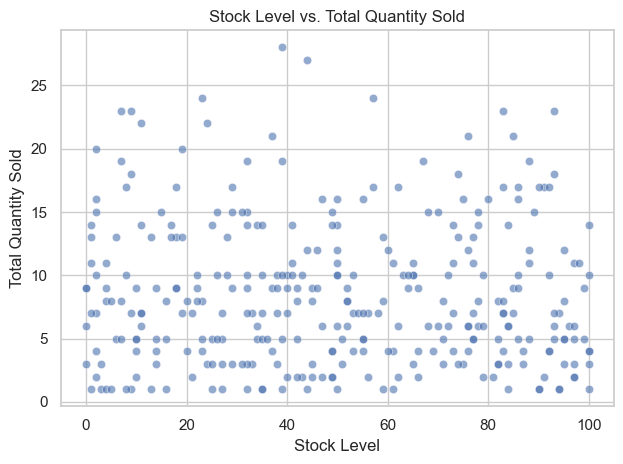

In [69]:
# Stock vs sales quantity

query = """ 
    SELECT B.stock,
    SUM(O.quantity) AS total_quantity_sold
    FROM books AS B
    INNER JOIN orders AS O ON
    B.book_id = O.book_id
    GROUP BY B.book_id, 1
"""

stock_vs_sales = duckdb.query(query).df()

sns.scatterplot(
    data=stock_vs_sales,
    x="Stock",
    y="total_quantity_sold",
    alpha = 0.6
)

plt.title('Stock Level vs. Total Quantity Sold')
plt.xlabel('Stock Level')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

**Insights:**

*No clear correlation between stock levels and sales performance*

*Potential overstocking High stock doesn't guarantee high sales*

*Possible understocking risks Some low-stock items might be selling well*

*Inventory inefficiency Stock distribution doesn't match sales patterns*

**Actions:**

*Conduct inventory audit Identify overstocked items with low sales*

*Implement demand forecasting Align stock levels with actual sales data*

*Reorder point optimization Set smart reorder levels based on sales velocity*

*Clearance strategy Reduce overstocked items through promotions*

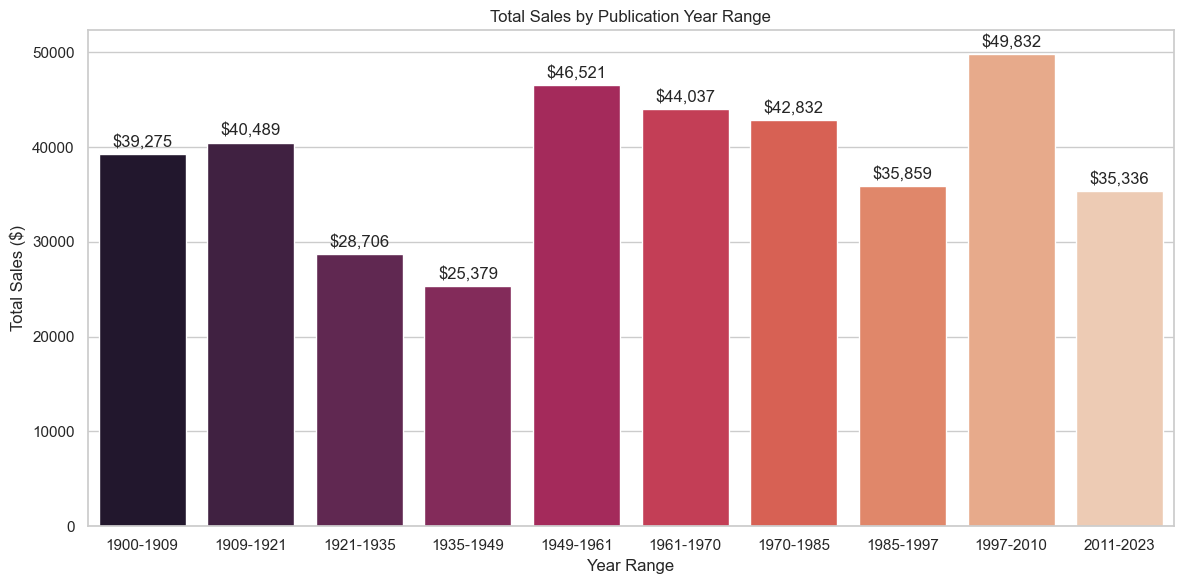

In [70]:
# Sales by decade of publication

query = """ 
    WITH year_ranges AS (
        SELECT 
            MIN(published_year) as min_year,
            MAX(published_year) as max_year,
            COUNT(*) as total_books
        FROM books
    ),
    ranges AS (
        SELECT 
            NTILE(10) OVER (ORDER BY published_year) as range_group,
            published_year
        FROM books
    )
    SELECT 
        MIN(r.published_year) as range_start,
        MAX(r.published_year) as range_end,
        SUM(O.total_amount) as total_sales
    FROM ranges r
    INNER JOIN books B ON r.published_year = B.published_year
    INNER JOIN orders O ON B.book_id = O.book_id
    GROUP BY r.range_group
    ORDER BY range_start
"""
decade = duckdb.query(query).df()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=decade, x='range_start', y='total_sales', palette='rocket')

plt.title('Total Sales by Publication Year Range')
plt.xlabel('Year Range')
plt.ylabel('Total Sales ($)')

labels = [f"{start}-{end}" for start, end in zip(decade['range_start'], decade['range_end'])]
plt.xticks(range(len(decade)), labels, rotation=360)

for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

**Insights**

*The "Golden Era" is 1997-2010: Books published in this period are your top performers by a significant margin, generating nearly $50,000 in sales. These are likely the modern bestsellers and established*

*The "Great Slump" (1921-1949): Sales drop off dramatically for books published between the 1920s and the end of the 1940s. This may be due to lower customer interest, less available inventory from that period (due to historical events like the Great Depression and WWII), or a combination of factors.*

**Action**

*Capitalize on the "Golden Era" (1997-2010) This is your strongest category. Curate a "Modern Must-Reads" or "2000s Throwback" collection. Analyze the specific genres and authors driving these sales and ensure you have deep inventory for these key titles.*

*nvestigate and Nurture Recent Titles (2011-2023) Analyze why recent books are underperforming. Is it a pricing issue? Are you not stocking the right new releases? Or do they simply need more time and marketing support to find their audience? Develop a strategy to better promote new arrivals to build them into future bestsellers.*





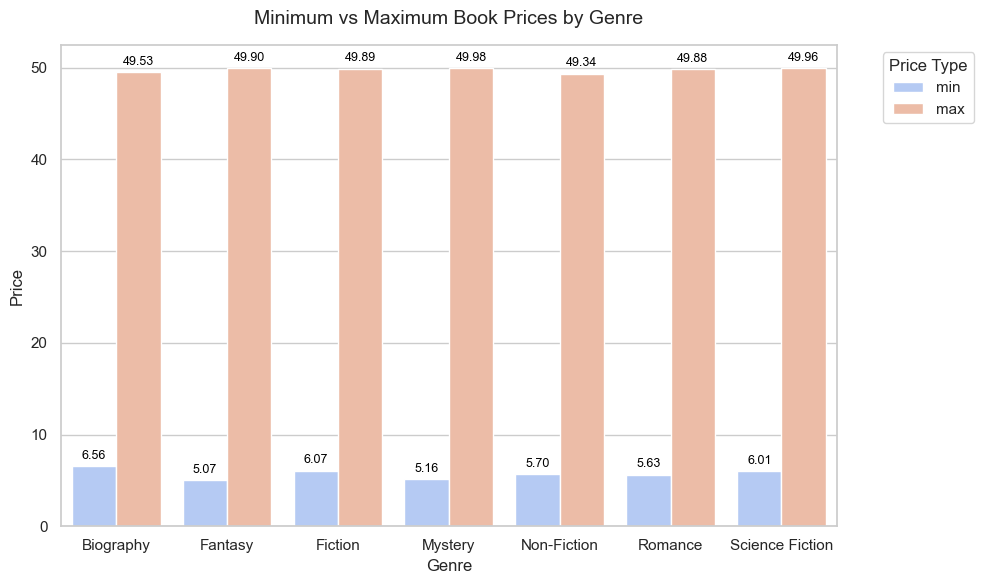

In [71]:

# Maxmium and minimum orice of books by genre

price_range = books.groupby("Genre")["Price"].agg(["min","max"]).reset_index()

price_range_melted = price_range.melt(
    id_vars="Genre",
    value_vars=["min", "max"],
    var_name="Price_Type",
    value_name="Price"
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Genre", y="Price", hue="Price_Type",
                 data=price_range_melted, palette="coolwarm")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9, color='black')

plt.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Minimum vs Maximum Book Prices by Genre", fontsize=14, pad=15)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

**Insight**

*The most significant finding is the lack of variation in maximum prices. Almost every genre tops out at just under $50. This suggests a potential market-wide price cap for premium formats like new release hardcovers or special editions.*

**Action**

*Ensure you have a healthy stock of books in the $5-$10 range to attract budget-conscious buyers and an appealing selection of new releases priced near the $50 ceiling.*

*Structure your inventory for each genre to include low-cost "entry-point" options and high-margin premium options. This data confirms that customers expect both.*







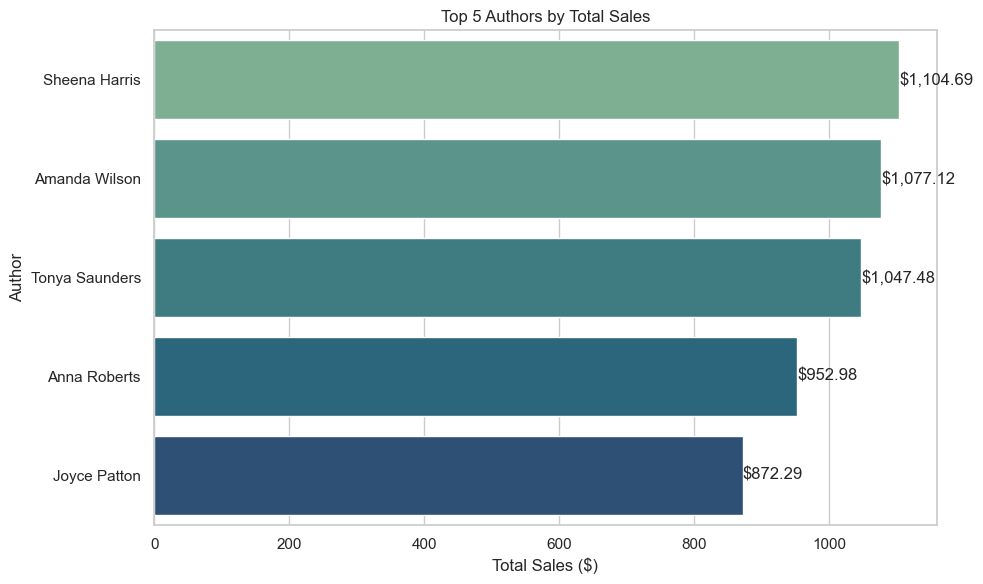

In [72]:
# Top 5 author by sales

query = """ 
    SELECT B.author,
    SUM(O.total_amount) AS total_sales
    FROM books as B
    INNER JOIN orders AS O ON
    B.book_id = O.book_id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 5
"""

top_5_authors = duckdb.query(query).df()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_authors, x='total_sales', y='Author', palette='crest')

plt.title('Top 5 Authors by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Author')

for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.1, p.get_y() + p.get_height() / 2,
                f'${width:,.2f}', va='center')
        
plt.tight_layout()
plt.show()

**Insight**

*Top Performer: Sheena Harris is the #1 selling author, with total sales of $1,104.69.*

*Close Competition: The top three authors have very similar sales figures. Amanda Wilson ($1,077.12) and Tonya Saunders ($1,047.48) are right behind Sheena Harris.*

*The Rest of the Pack: There is a small drop in sales to the next two authors. Anna Roberts is in fourth place ($952.98), and Joyce Patton is in fifth ($872.29)*



In [73]:
# Top 5 countries by genre

top_countries_query = """
    SELECT c.Country
    FROM orders o
    JOIN customers c ON o.Customer_ID = c.Customer_ID
    GROUP BY c.Country
    ORDER BY SUM(o.Quantity) DESC
    LIMIT 5;
"""
top_5_countries = duckdb.query(top_countries_query).df()['Country'].tolist()

print("Top 5 countries:", top_5_countries)

query = """ 
    WITH RankedGenres AS (
        SELECT
            c.Country,
            b.Genre,
            SUM(o.Quantity) as TotalQuantity,
            ROW_NUMBER() OVER(PARTITION BY c.Country ORDER BY SUM(o.Quantity) DESC) as rn
        FROM orders o
        JOIN customers c ON o.Customer_ID = c.Customer_ID
        JOIN books b ON o.Book_ID = b.Book_ID
        WHERE c.Country IN (SELECT value FROM (VALUES (?), (?), (?), (?), (?)) AS countries(value))
        GROUP BY c.Country, b.Genre
    )
    SELECT Country, Genre, TotalQuantity
    FROM RankedGenres
    WHERE rn = 1;
"""
genre_country = duckdb.query(query, params=top_5_countries).df()
genre_country

Top 5 countries: ['New Zealand', 'Heard Island and McDonald Islands', 'Jersey', 'Hungary', 'New Caledonia']


,Country,Genre,TotalQuantity
0,New Caledonia,Science Fiction,10.0
1,Heard Island and McDonald Islands,Mystery,16.0
2,Hungary,Science Fiction,19.0
3,Jersey,Mystery,21.0
4,New Zealand,Mystery,22.0


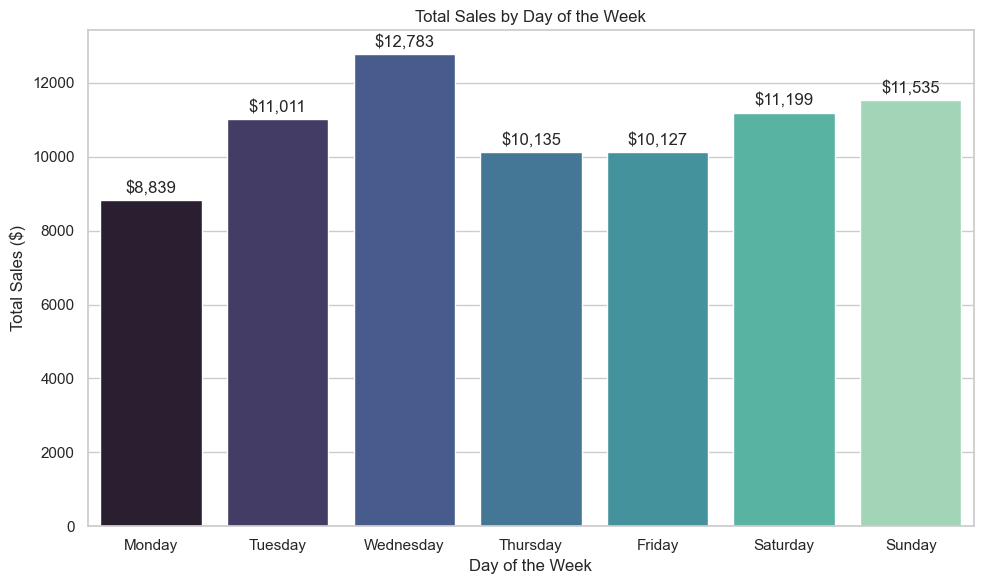

In [74]:
query = """
    SELECT
        CASE (CAST(strftime(CAST(Order_Date AS DATE), '%w') AS INTEGER))
            WHEN 0 THEN 'Sunday'
            WHEN 1 THEN 'Monday'
            WHEN 2 THEN 'Tuesday'
            WHEN 3 THEN 'Wednesday'
            WHEN 4 THEN 'Thursday'
            WHEN 5 THEN 'Friday'
            WHEN 6 THEN 'Saturday'
        END AS DayOfWeek,
        SUM(Total_Amount) AS TotalSales
    FROM orders
    GROUP BY DayOfWeek
    ORDER BY
        CASE DayOfWeek
            WHEN 'Sunday' THEN 7
            WHEN 'Monday' THEN 1
            WHEN 'Tuesday' THEN 2
            WHEN 'Wednesday' THEN 3
            WHEN 'Thursday' THEN 4
            WHEN 'Friday' THEN 5
            WHEN 'Saturday' THEN 6
        END;
    """
day_of_week_sales = duckdb.query(query).df()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=day_of_week_sales, x='DayOfWeek', y='TotalSales', palette='mako')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')

for p in ax.patches:
        ax.annotate(f"${p.get_height():,.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


**Insights**

*Peak Sales Day: Wednesday is the best day for sales by a large margin, reaching a peak of $12,783. This is the strongest performing day of the entire week.*

*Mid-Week Dip: After the Wednesday peak, sales drop on Thursday ($10,135) and Friday ($10,127), which have nearly identical performance.*

**Action**

*Run special promotions, discounts, or marketing campaigns specifically on Mondays to attract more customers on the slowest day*

*Schedule more staff for Wednesday and the weekend (Saturday/Sunday). Use Monday for administrative tasks, training, or planning, as customer traffic is lower*
